In [16]:
import pandas as pd

# Load and combine
df_2020 = pd.read_csv("cleaned_2020.csv")
df_2021 = pd.read_csv("cleaned_2021.csv")
df_2022 = pd.read_csv("cleaned_2022.csv")
df_2023 = pd.read_csv("cleaned_2023.csv")
df_2024 = pd.read_csv("cleaned_2024.csv")

df_all = pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True)


In [17]:

# Group by transport mode and year, then sum VALUE and SHIPWT
freight_by_mode = df_all.groupby(['YEAR', 'DISAGMOT_MAPPED'])[['VALUE', 'SHIPWT']].sum().reset_index()

# See results
print(freight_by_mode.sort_values(by=['YEAR', 'VALUE'], ascending=[True, False]))

    YEAR DISAGMOT_MAPPED          VALUE        SHIPWT
6   2020           Truck  1510853406789  250243259265
5   2020            Rail   317672232150  205082076630
7   2020          Vessel   150288840813  421991868132
4   2020        Pipeline   116253503289  360609601914
0   2020             Air   100684200072     675874755
3   2020           Other    99167434608     595412232
1   2020             FTZ    11783550621    6314749998
2   2020            Mail       55119909           168
14  2021           Truck  2483666265435  361614614994
13  2021            Rail   559375553031  279937928067
12  2021        Pipeline   294653944503  522250241196
15  2021          Vessel   292250471331  580348733589
11  2021           Other   169249531956     634975836
8   2021             Air   158203024071     966409416
9   2021             FTZ    18498717672    7792086894
10  2021            Mail       76970223           126
22  2022           Truck  2843781419469  358008366057
21  2022            Rail   6

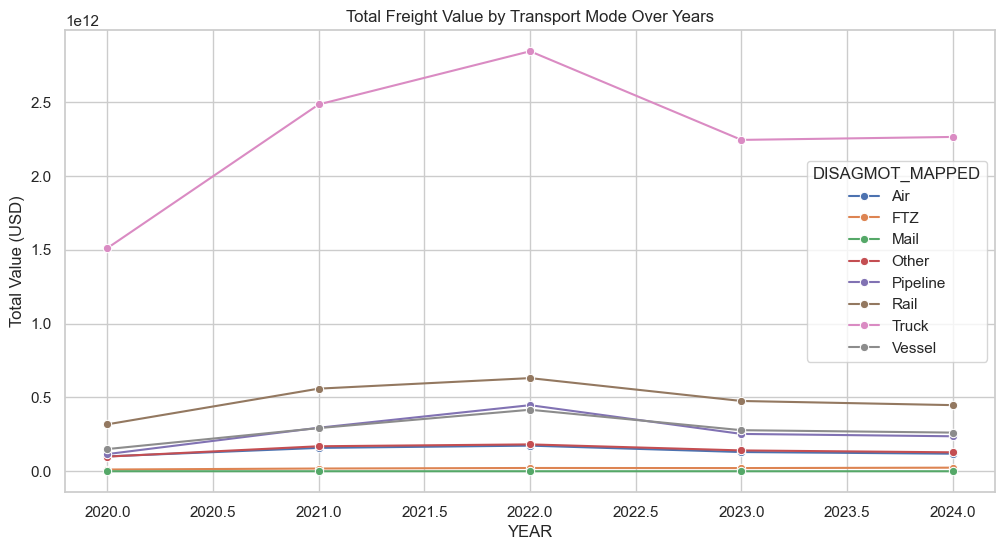

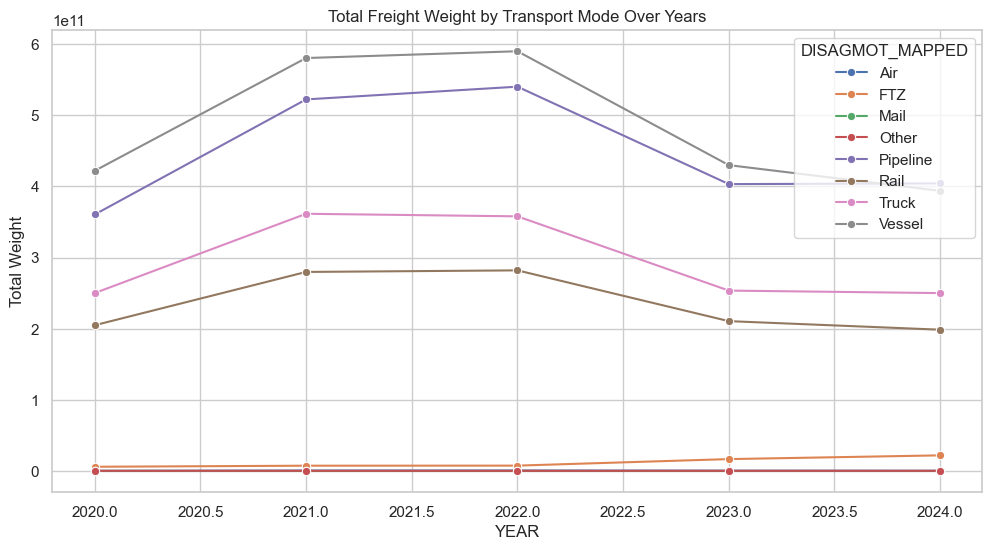

In [18]:


import seaborn as sns
import matplotlib.pyplot as plt

# Value over time by mode
plt.figure(figsize=(12, 6))
sns.lineplot(data=freight_by_mode, x="YEAR", y="VALUE", hue="DISAGMOT_MAPPED", marker='o')
plt.title("Total Freight Value by Transport Mode Over Years")
plt.ylabel("Total Value (USD)")
plt.show()

# Weight over time by mode
plt.figure(figsize=(12, 6))
sns.lineplot(data=freight_by_mode, x="YEAR", y="SHIPWT", hue="DISAGMOT_MAPPED", marker='o')
plt.title("Total Freight Weight by Transport Mode Over Years")
plt.ylabel("Total Weight")
plt.show()


In [19]:
!pip install pandas matplotlib seaborn



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


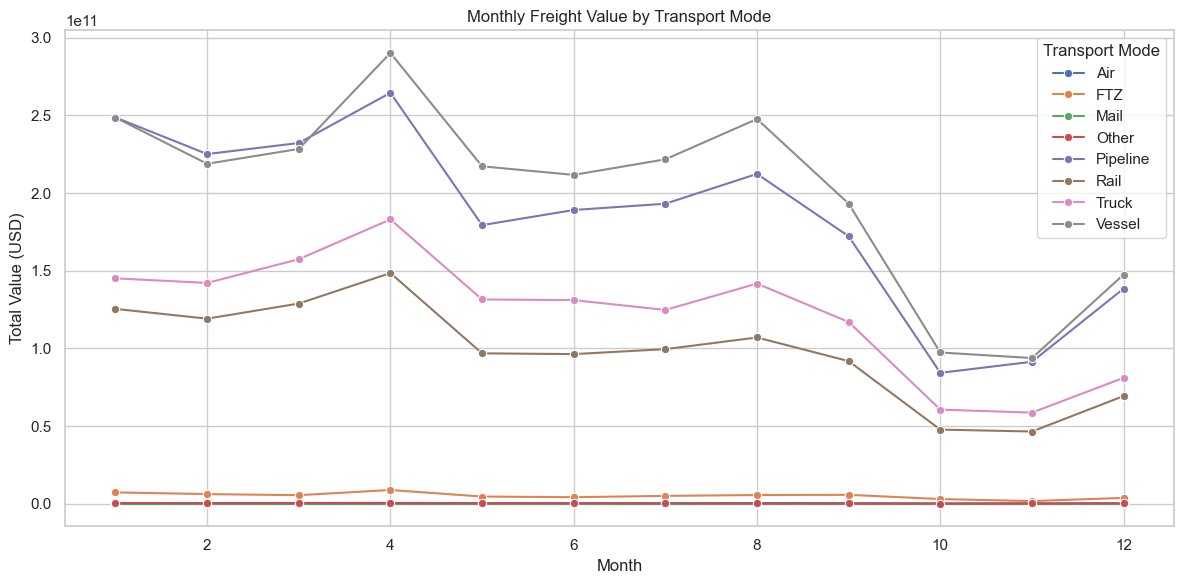

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by MONTH and transport mode
monthly_value = df_all.groupby(['MONTH', 'DISAGMOT_MAPPED'])['SHIPWT'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_value, x='MONTH', y='SHIPWT', hue='DISAGMOT_MAPPED', marker='o')
plt.title('Monthly Freight Value by Transport Mode')
plt.xlabel('Month')
plt.ylabel('Total Value (USD)')
plt.legend(title='Transport Mode')
plt.grid(True)
plt.tight_layout()
plt.show()


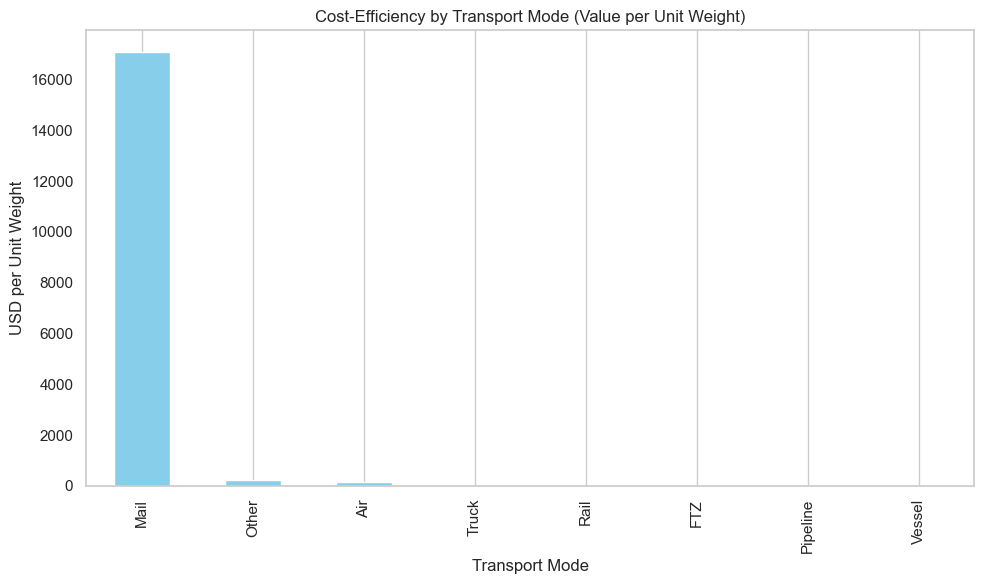

                 VALUE_PER_WEIGHT
DISAGMOT_MAPPED                  
Mail                 17086.034780
Other                  233.889563
Air                    162.249658
Truck                    7.698087
Rail                     2.066058
FTZ                      1.600838
Pipeline                 0.604327
Vessel                   0.578970


In [21]:
# Group by transport mode and sum VALUE and SHIPWT
efficiency = df_all.groupby('DISAGMOT_MAPPED')[['VALUE', 'SHIPWT']].sum()

# Calculate cost-efficiency
efficiency['VALUE_PER_WEIGHT'] = efficiency['VALUE'] / efficiency['SHIPWT']

# Sort for better visualization
efficiency_sorted = efficiency.sort_values(by='VALUE_PER_WEIGHT', ascending=False)

# Plot
efficiency_sorted['VALUE_PER_WEIGHT'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Cost-Efficiency by Transport Mode (Value per Unit Weight)')
plt.ylabel('USD per Unit Weight')
plt.xlabel('Transport Mode')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Optional: Display the actual values
print(efficiency_sorted[['VALUE_PER_WEIGHT']])


C:\Users\user\AppData\Local\Temp\ipykernel_15084\3549144915.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_value, x='VALUE', y='COMMODITY2_MAPPED', palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_15084\3549144915.py:17: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


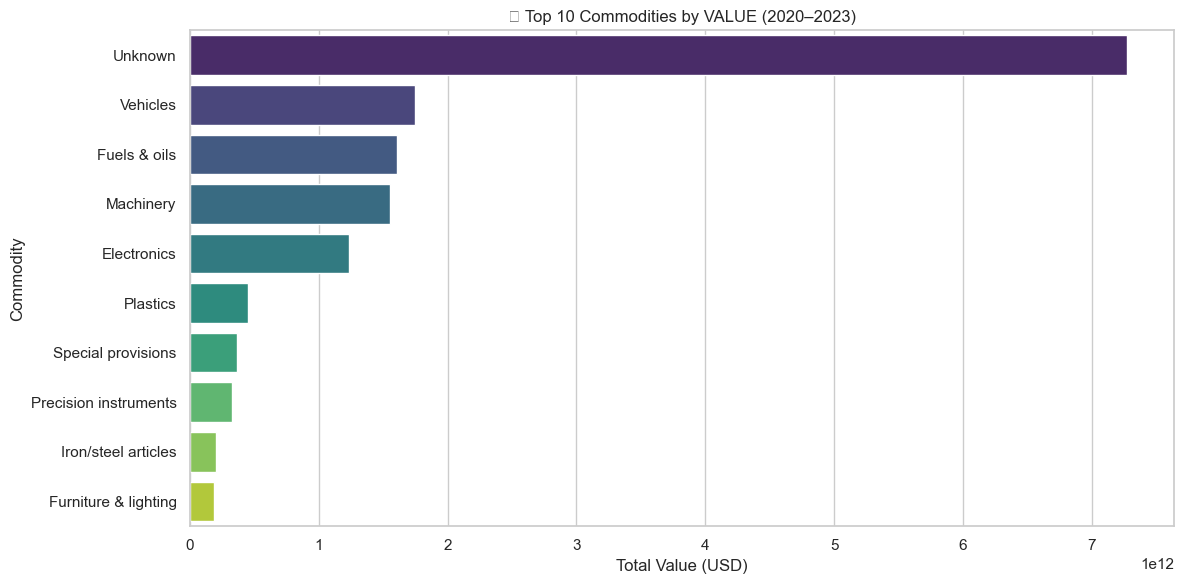

C:\Users\user\AppData\Local\Temp\ipykernel_15084\3549144915.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_weight, x='SHIPWT', y='COMMODITY2_MAPPED', palette='magma')
C:\Users\user\AppData\Local\Temp\ipykernel_15084\3549144915.py:26: UserWarning: Glyph 9878 (\N{SCALES}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_15084\3549144915.py:26: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9878 (\N{SCALES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16})

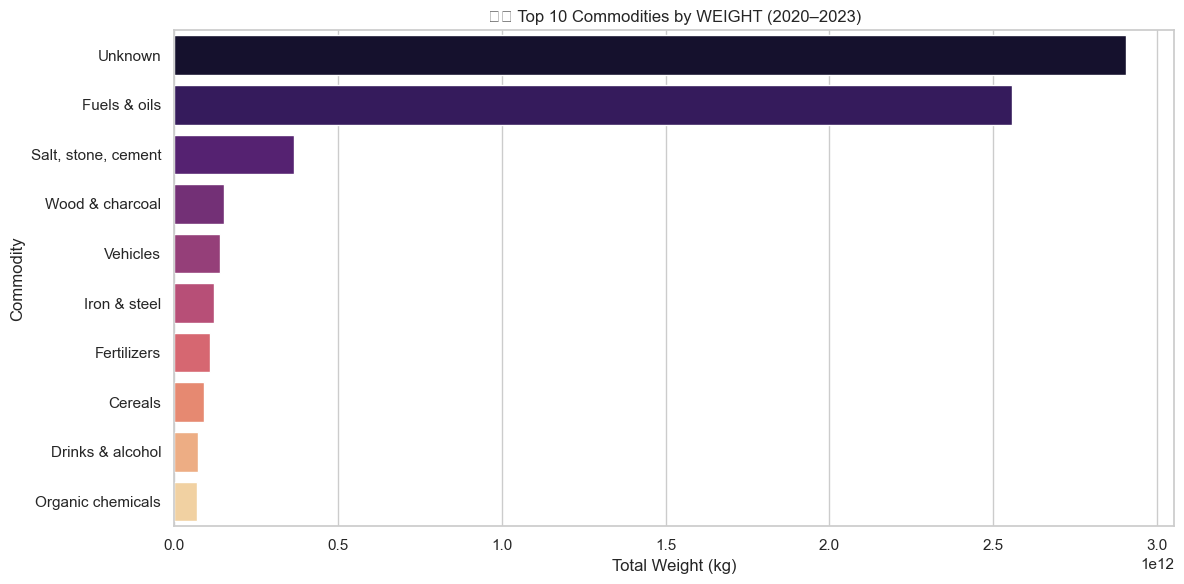

In [22]:

# Group by commodity and sum value and weight
commodity_summary = df_all.groupby('COMMODITY2_MAPPED')[['VALUE', 'SHIPWT']].sum().reset_index()

# Sort and select top 10
top_value = commodity_summary.sort_values(by='VALUE', ascending=False).head(10)
top_weight = commodity_summary.sort_values(by='SHIPWT', ascending=False).head(10)

# Set seaborn style
sns.set(style='whitegrid')

# Plot Top 10 Commodities by VALUE
plt.figure(figsize=(12, 6))
sns.barplot(data=top_value, x='VALUE', y='COMMODITY2_MAPPED', palette='viridis')
plt.title('📦 Top 10 Commodities by VALUE (2020–2023)')
plt.xlabel('Total Value (USD)')
plt.ylabel('Commodity')
plt.tight_layout()
plt.show()

# Plot Top 10 Commodities by WEIGHT
plt.figure(figsize=(12, 6))
sns.barplot(data=top_weight, x='SHIPWT', y='COMMODITY2_MAPPED', palette='magma')
plt.title('⚖️ Top 10 Commodities by WEIGHT (2020–2023)')
plt.xlabel('Total Weight (kg)')
plt.ylabel('Commodity')
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_15084\2674444258.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_value, x='VALUE', y='REGION', palette='crest')
C:\Users\user\AppData\Local\Temp\ipykernel_15084\2674444258.py:16: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


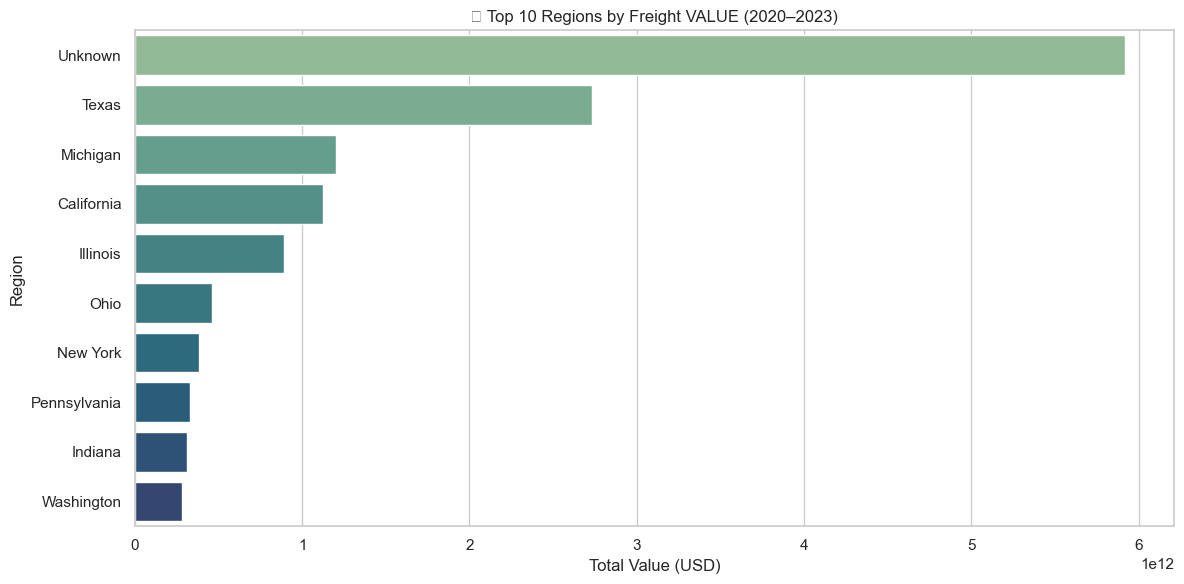

C:\Users\user\AppData\Local\Temp\ipykernel_15084\2674444258.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_weight, x='SHIPWT', y='REGION', palette='flare')
C:\Users\user\AppData\Local\Temp\ipykernel_15084\2674444258.py:27: UserWarning: Glyph 127947 (\N{WEIGHT LIFTER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_15084\2674444258.py:27: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127947 (\N{WEIGHT LIFTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECT

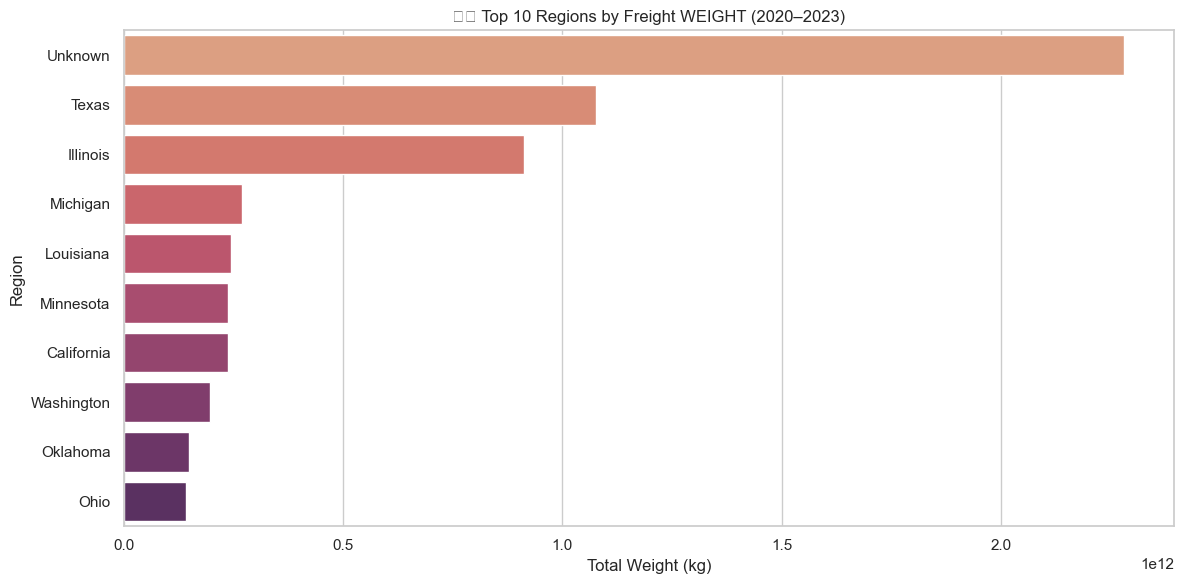

In [23]:


# Combine regions
region_cols = ['USASTATE_MAPPED', 'MEXSTATE_MAPPED', 'CANPROV_MAPPED']
df_all['REGION'] = df_all[region_cols].bfill(axis=1).iloc[:, 0]  # Pick first non-null

# Group by region
region_summary = df_all.groupby('REGION')[['VALUE', 'SHIPWT']].sum().reset_index()

# Top 10 by Value
top_value = region_summary.sort_values(by='VALUE', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_value, x='VALUE', y='REGION', palette='crest')
plt.title('💰 Top 10 Regions by Freight VALUE (2020–2023)')
plt.xlabel('Total Value (USD)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

# Top 10 by Weight
top_weight = region_summary.sort_values(by='SHIPWT', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_weight, x='SHIPWT', y='REGION', palette='flare')
plt.title('🏋️ Top 10 Regions by Freight WEIGHT (2020–2023)')
plt.xlabel('Total Weight (kg)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_15084\1021110012.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_regions, x='VALUE', y='REGION', palette='magma')
C:\Users\user\AppData\Local\Temp\ipykernel_15084\1021110012.py:25: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


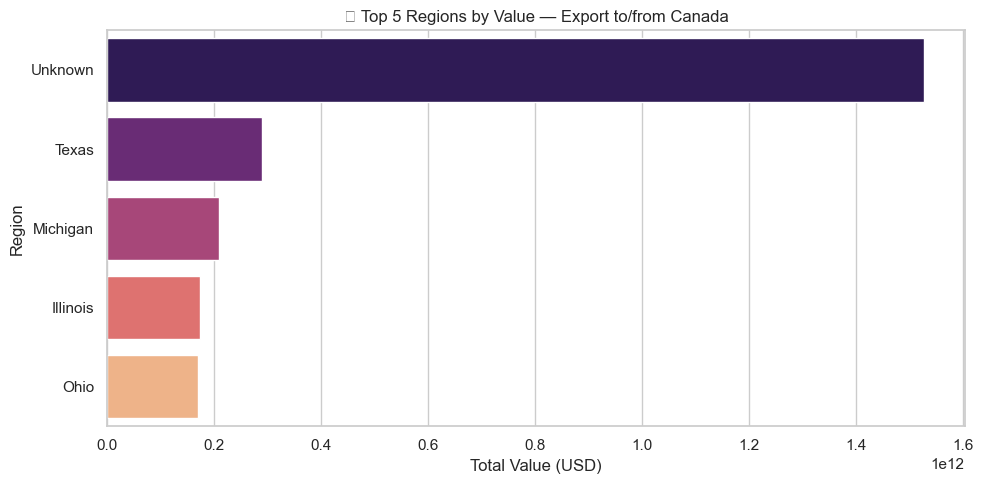

C:\Users\user\AppData\Local\Temp\ipykernel_15084\1021110012.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_regions, x='VALUE', y='REGION', palette='magma')
C:\Users\user\AppData\Local\Temp\ipykernel_15084\1021110012.py:25: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


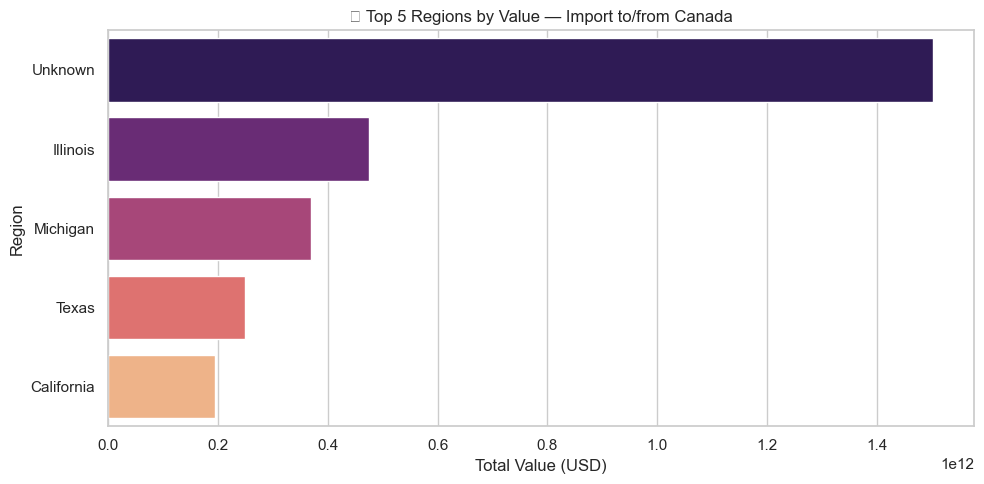

C:\Users\user\AppData\Local\Temp\ipykernel_15084\1021110012.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_regions, x='VALUE', y='REGION', palette='magma')
C:\Users\user\AppData\Local\Temp\ipykernel_15084\1021110012.py:25: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


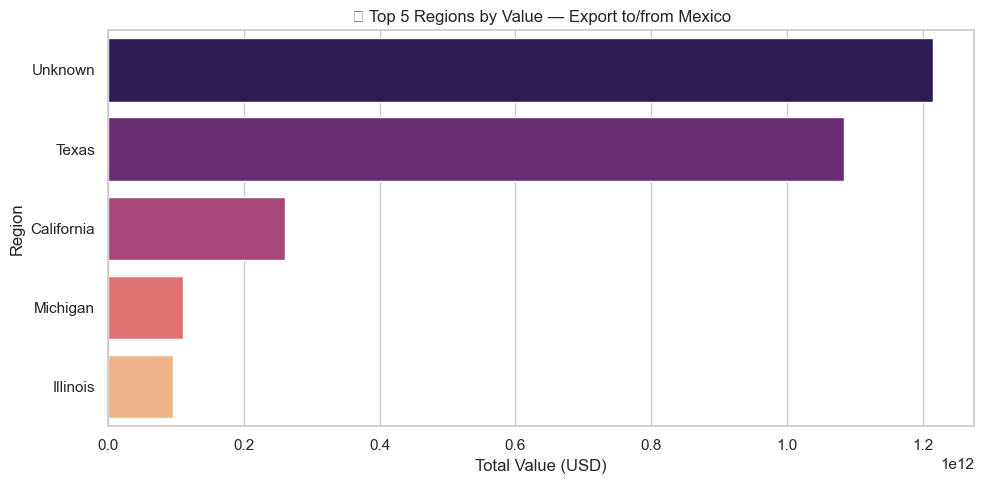

C:\Users\user\AppData\Local\Temp\ipykernel_15084\1021110012.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_regions, x='VALUE', y='REGION', palette='magma')
C:\Users\user\AppData\Local\Temp\ipykernel_15084\1021110012.py:25: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


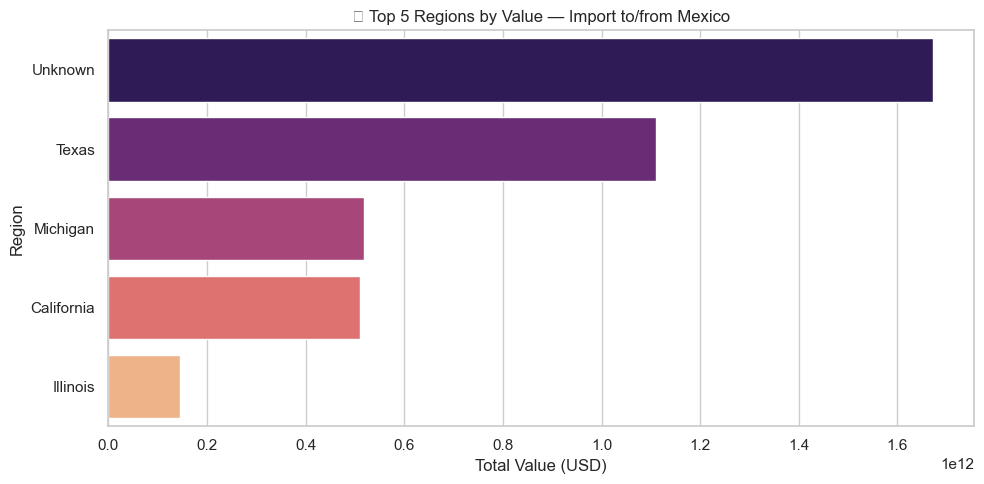

In [24]:

# Add helper columns
df_all['COUNTRY_TYPE'] = df_all['COUNTRY_MAPPED']     # Canada or Mexico
df_all['TRADE_TYPE'] = df_all['TRDTYPE_MAPPED']       # Export or Import

# Create unified REGION column from available location columns
df_all['REGION'] = df_all[['USASTATE_MAPPED', 'MEXSTATE_MAPPED', 'CANPROV_MAPPED']].bfill(axis=1).iloc[:, 0]

# Group by COUNTRY + TRADE TYPE + REGION
region_split = (
    df_all
    .groupby(['COUNTRY_TYPE', 'TRADE_TYPE', 'REGION'])[['VALUE', 'SHIPWT']]
    .sum()
    .reset_index()
)

# Visualize Top 5 Regions by Value per Country/Trade Type
for (country, trade), group in region_split.groupby(['COUNTRY_TYPE', 'TRADE_TYPE']):
    top_regions = group.sort_values('VALUE', ascending=False).head(5)
    
    plt.figure(figsize=(10, 5))
    sns.barplot(data=top_regions, x='VALUE', y='REGION', palette='magma')
    plt.title(f'💰 Top 5 Regions by Value — {trade} to/from {country}')
    plt.xlabel('Total Value (USD)')
    plt.ylabel('Region')
    plt.tight_layout()
    plt.show()



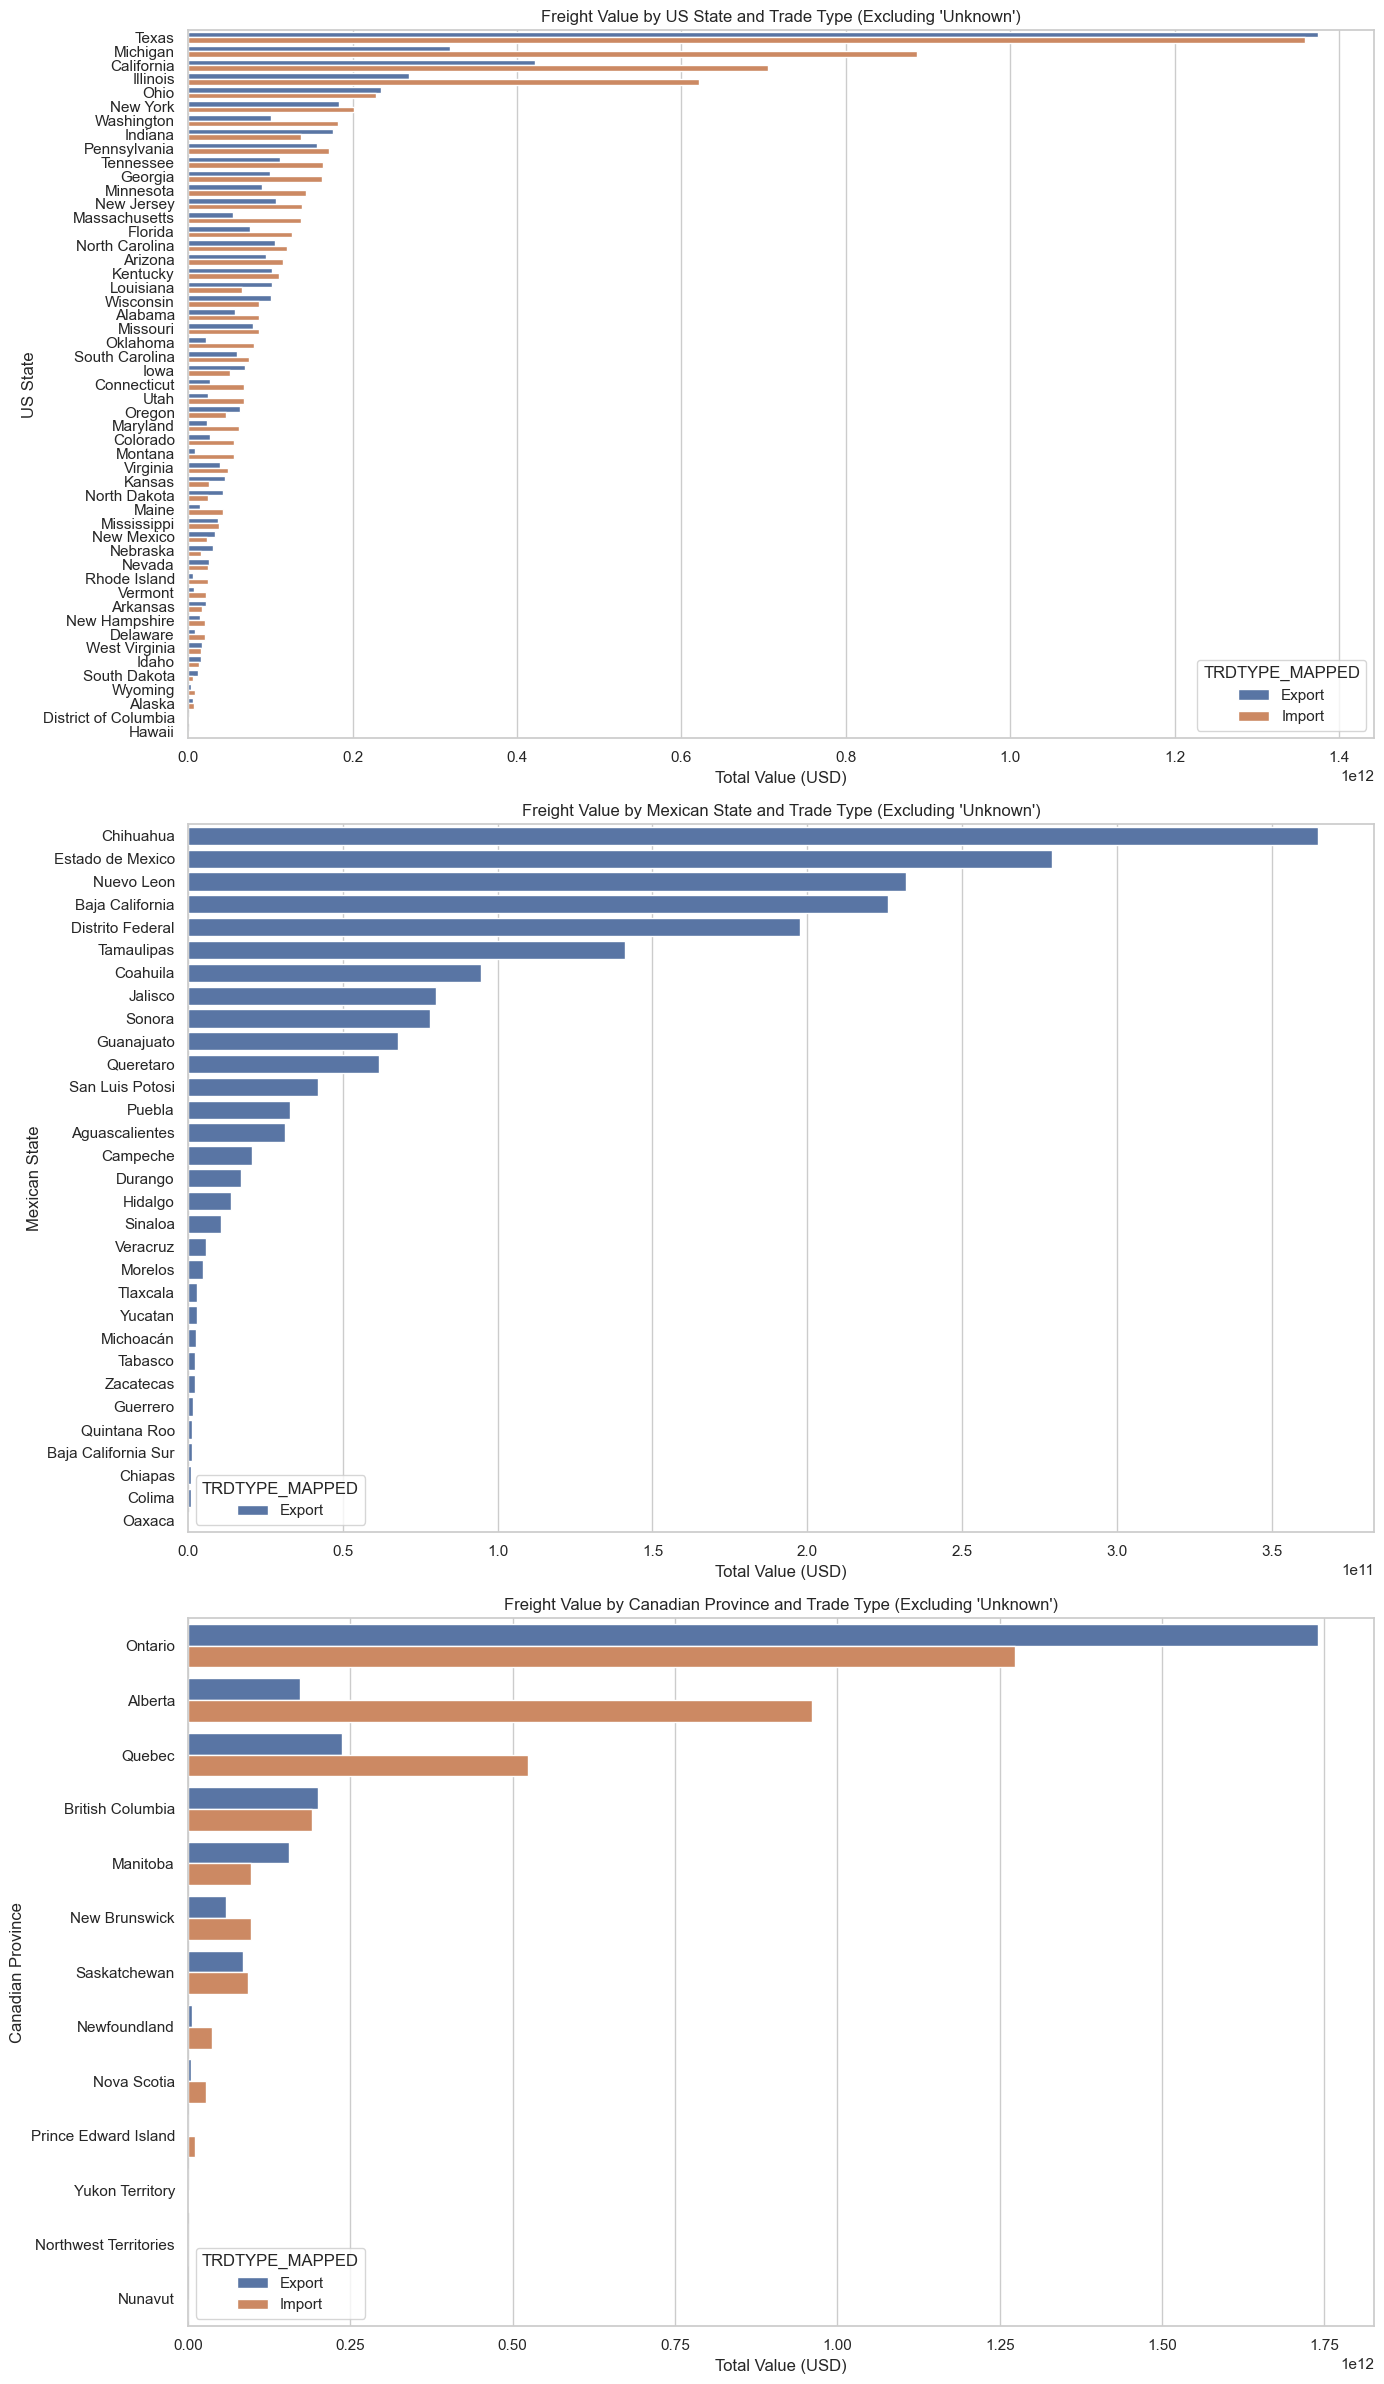

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove 'Unknown' values only for plotting
df_filtered_us = df_all[df_all['USASTATE_MAPPED'] != 'Unknown']
df_filtered_mex = df_all[df_all['MEXSTATE_MAPPED'] != 'Unknown']
df_filtered_can = df_all[df_all['CANPROV_MAPPED'] != 'Unknown']

# Grouping by US State and Trade Type
us_exports_imports = df_filtered_us.groupby(['USASTATE_MAPPED', 'TRDTYPE_MAPPED'])[['VALUE', 'SHIPWT']].sum().reset_index()

# Grouping by Mexican State and Trade Type
mex_exports_imports = df_filtered_mex.groupby(['MEXSTATE_MAPPED', 'TRDTYPE_MAPPED'])[['VALUE', 'SHIPWT']].sum().reset_index()

# Grouping by Canadian Province and Trade Type
can_exports_imports = df_filtered_can.groupby(['CANPROV_MAPPED', 'TRDTYPE_MAPPED'])[['VALUE', 'SHIPWT']].sum().reset_index()

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(14, 24))
sns.set(style="whitegrid")

# US plot
sns.barplot(data=us_exports_imports.sort_values(by="VALUE", ascending=False), 
            x="VALUE", y="USASTATE_MAPPED", hue="TRDTYPE_MAPPED", ax=axes[0])
axes[0].set_title("Freight Value by US State and Trade Type (Excluding 'Unknown')")
axes[0].set_xlabel("Total Value (USD)")
axes[0].set_ylabel("US State")

# Mexico plot
sns.barplot(data=mex_exports_imports.sort_values(by="VALUE", ascending=False), 
            x="VALUE", y="MEXSTATE_MAPPED", hue="TRDTYPE_MAPPED", ax=axes[1])
axes[1].set_title("Freight Value by Mexican State and Trade Type (Excluding 'Unknown')")
axes[1].set_xlabel("Total Value (USD)")
axes[1].set_ylabel("Mexican State")

# Canada plot
sns.barplot(data=can_exports_imports.sort_values(by="VALUE", ascending=False), 
            x="VALUE", y="CANPROV_MAPPED", hue="TRDTYPE_MAPPED", ax=axes[2])
axes[2].set_title("Freight Value by Canadian Province and Trade Type (Excluding 'Unknown')")
axes[2].set_xlabel("Total Value (USD)")
axes[2].set_ylabel("Canadian Province")

plt.tight_layout()
plt.show()


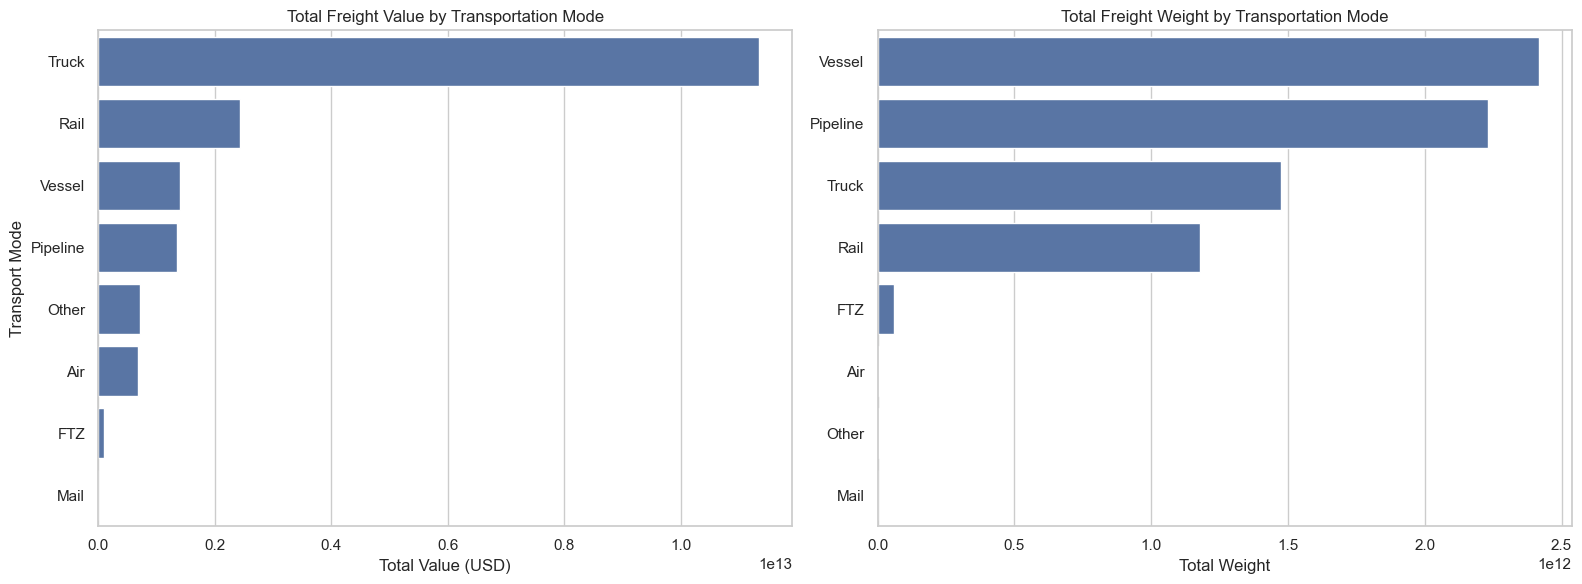

C:\Users\user\AppData\Local\Temp\ipykernel_15084\4066217364.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mode_stats.sort_values(by="VALUE_PER_WEIGHT", ascending=False),


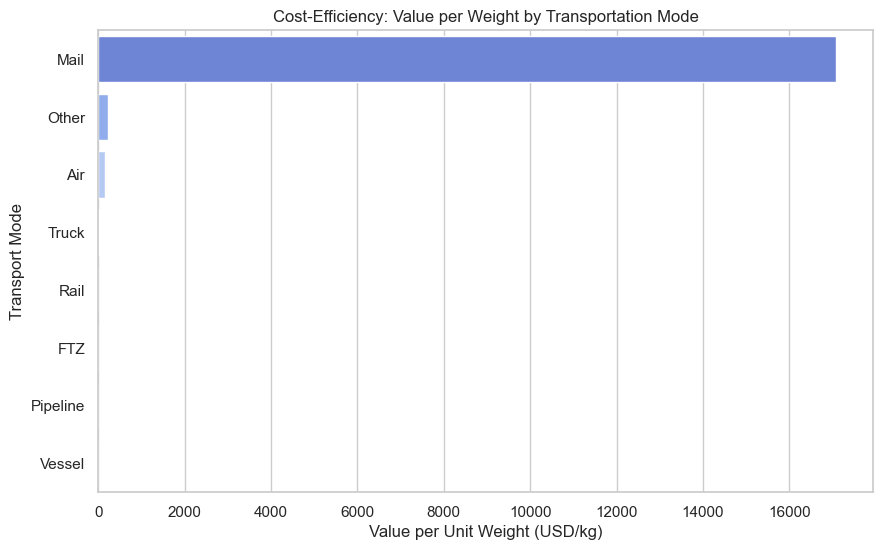

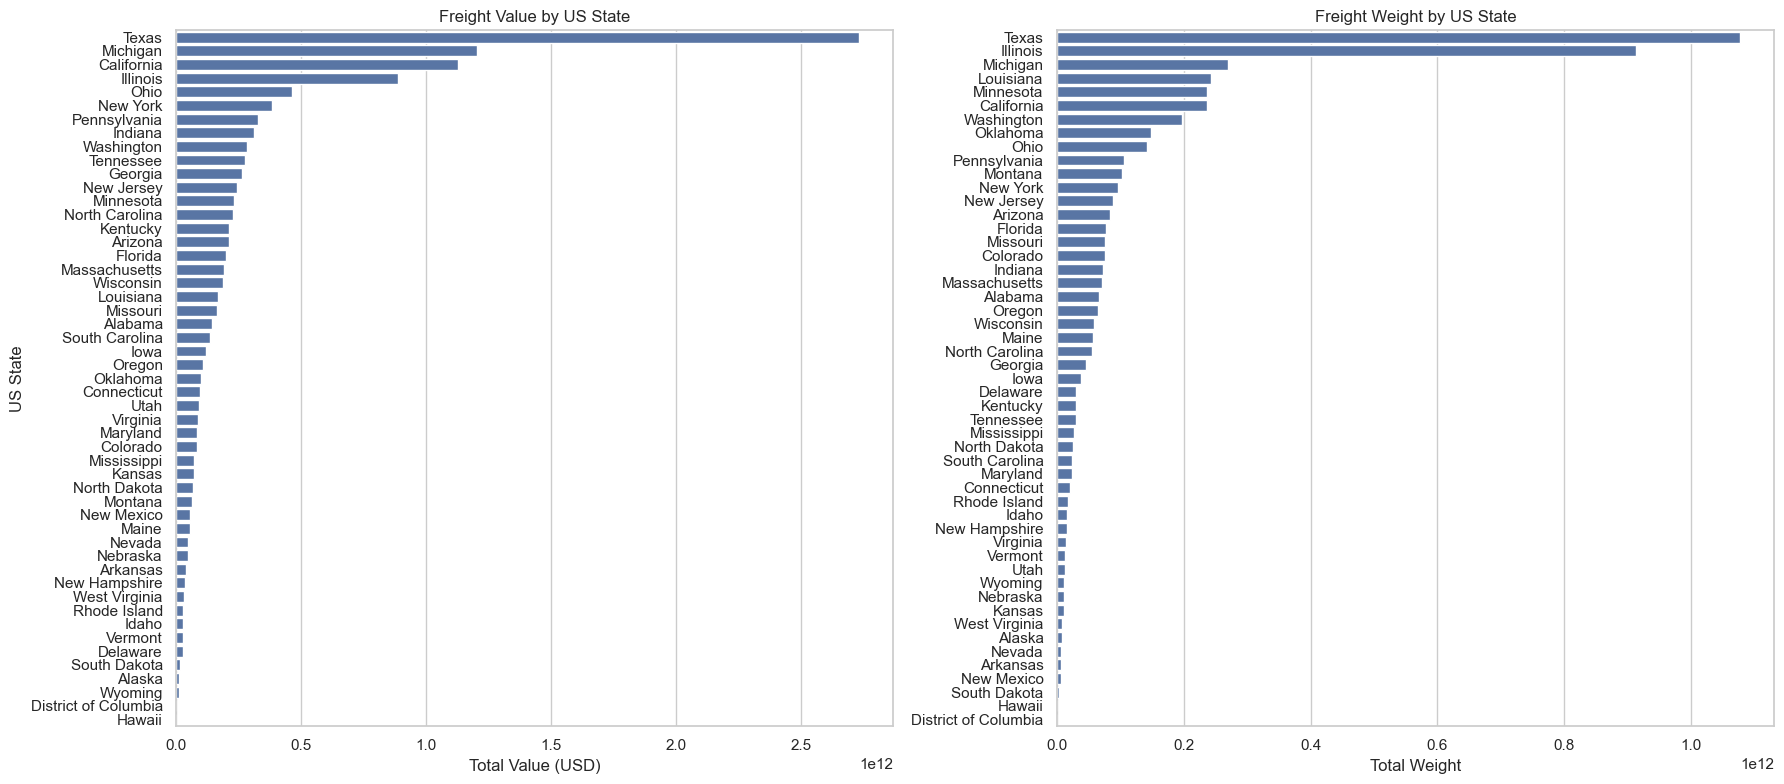

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1. Freight Volume and Value by Transport Mode
mode_stats = df_all.groupby('DISAGMOT_MAPPED')[['VALUE', 'SHIPWT']].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=mode_stats.sort_values(by="VALUE", ascending=False), x="VALUE", y="DISAGMOT_MAPPED", ax=axes[0])
axes[0].set_title("Total Freight Value by Transportation Mode")
axes[0].set_xlabel("Total Value (USD)")
axes[0].set_ylabel("Transport Mode")

sns.barplot(data=mode_stats.sort_values(by="SHIPWT", ascending=False), x="SHIPWT", y="DISAGMOT_MAPPED", ax=axes[1])
axes[1].set_title("Total Freight Weight by Transportation Mode")
axes[1].set_xlabel("Total Weight")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


# 2. Value per Weight by Mode (Efficiency)
mode_stats['VALUE_PER_WEIGHT'] = mode_stats['VALUE'] / mode_stats['SHIPWT']

plt.figure(figsize=(10, 6))
sns.barplot(data=mode_stats.sort_values(by="VALUE_PER_WEIGHT", ascending=False),
            x="VALUE_PER_WEIGHT", y="DISAGMOT_MAPPED", palette="coolwarm")
plt.title("Cost-Efficiency: Value per Weight by Transportation Mode")
plt.xlabel("Value per Unit Weight (USD/kg)")
plt.ylabel("Transport Mode")
plt.show()


# 3. Freight Value and Weight by US States (as an example region)
region_stats = df_all.groupby('USASTATE_MAPPED')[['VALUE', 'SHIPWT']].sum().reset_index()
region_stats = region_stats[region_stats['USASTATE_MAPPED'] != 'Unknown']

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(data=region_stats.sort_values(by='VALUE', ascending=False), 
            y='USASTATE_MAPPED', x='VALUE', ax=axes[0])
axes[0].set_title("Freight Value by US State")
axes[0].set_xlabel("Total Value (USD)")
axes[0].set_ylabel("US State")

sns.barplot(data=region_stats.sort_values(by='SHIPWT', ascending=False), 
            y='USASTATE_MAPPED', x='SHIPWT', ax=axes[1])
axes[1].set_title("Freight Weight by US State")
axes[1].set_xlabel("Total Weight")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


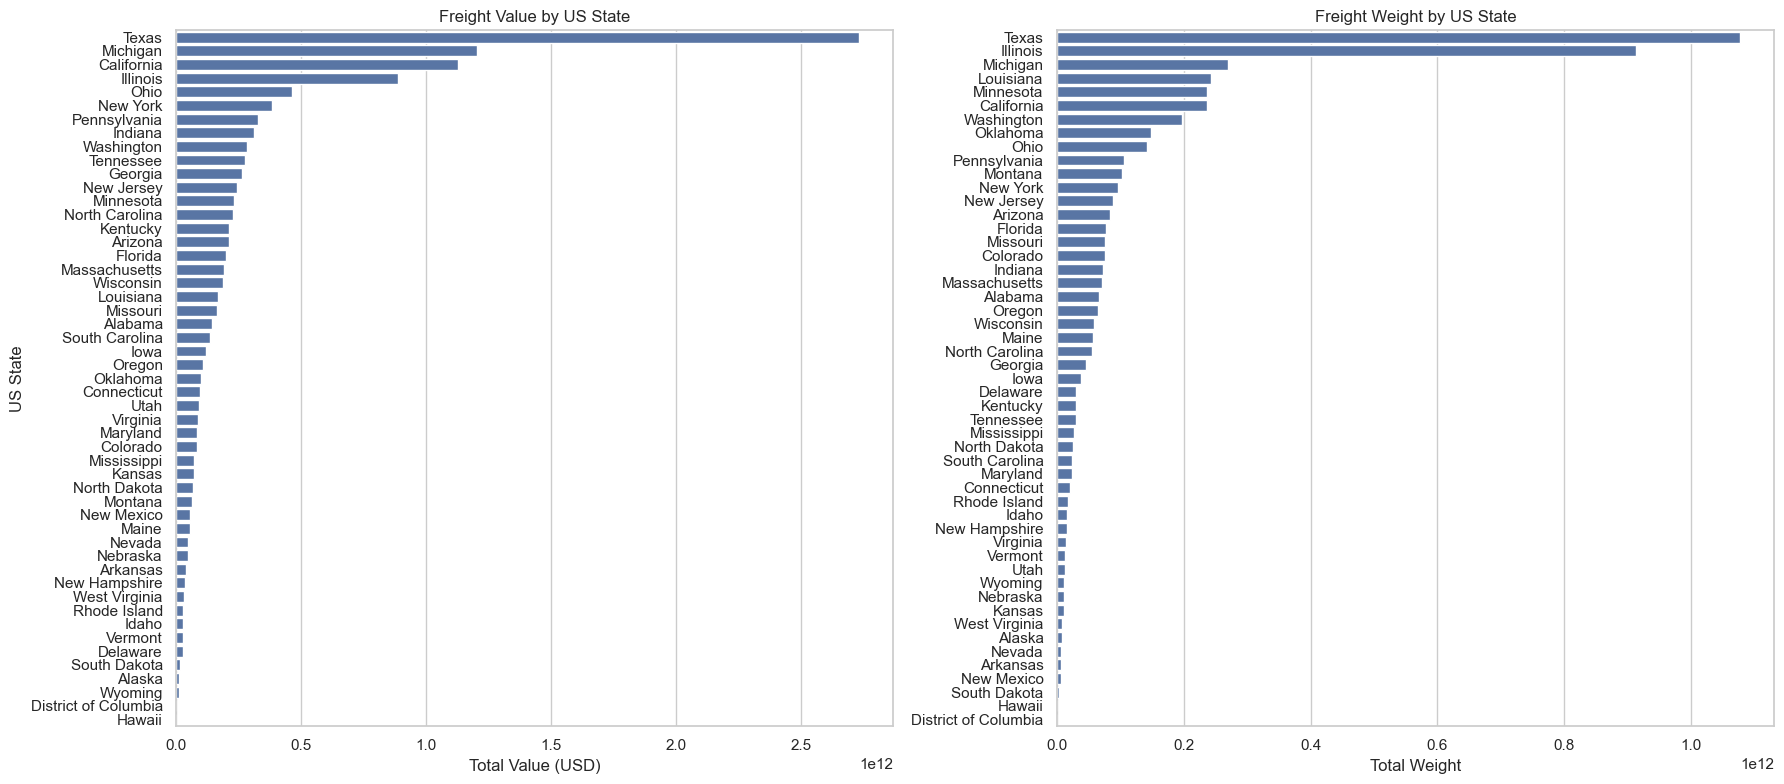

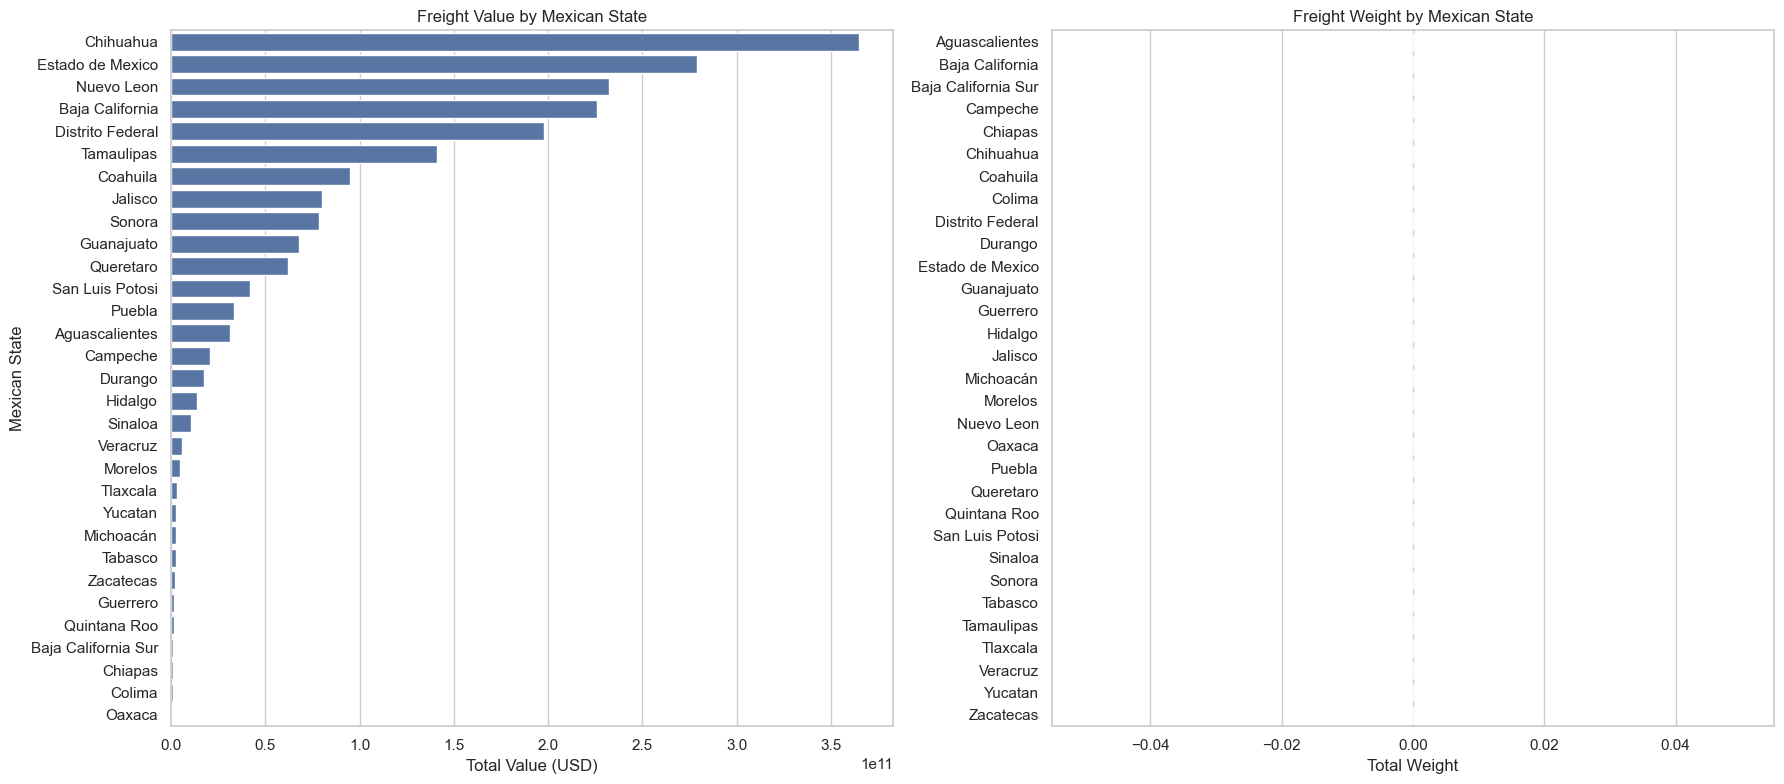

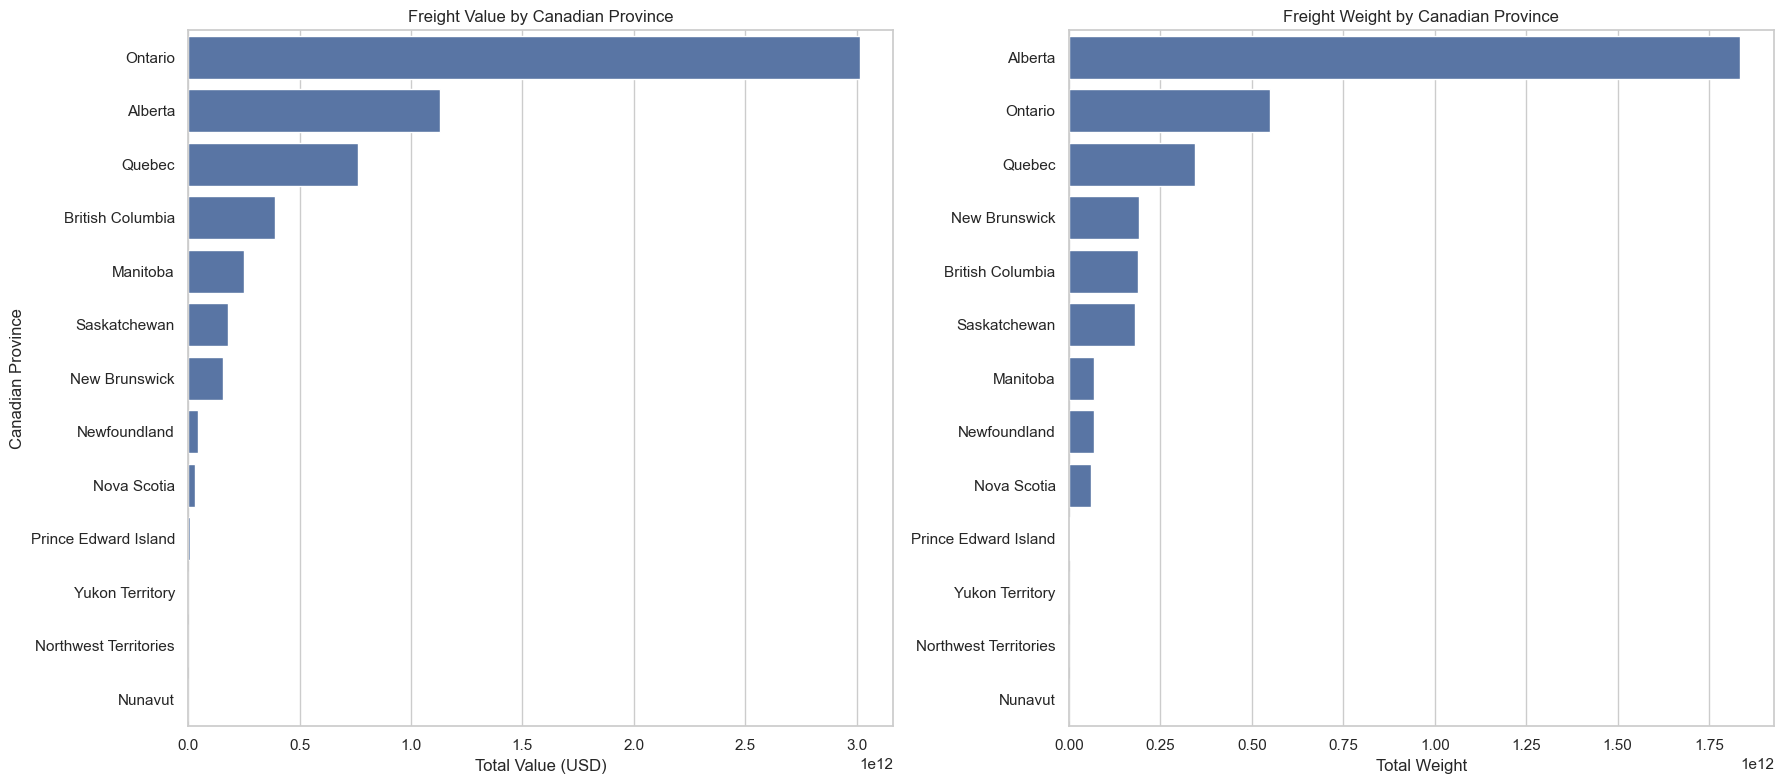

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# --- US ---
us_stats = df_all[df_all['USASTATE_MAPPED'] != 'Unknown'].groupby('USASTATE_MAPPED')[['VALUE', 'SHIPWT']].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(data=us_stats.sort_values(by='VALUE', ascending=False), 
            y='USASTATE_MAPPED', x='VALUE', ax=axes[0])
axes[0].set_title("Freight Value by US State")
axes[0].set_xlabel("Total Value (USD)")
axes[0].set_ylabel("US State")

sns.barplot(data=us_stats.sort_values(by='SHIPWT', ascending=False), 
            y='USASTATE_MAPPED', x='SHIPWT', ax=axes[1])
axes[1].set_title("Freight Weight by US State")
axes[1].set_xlabel("Total Weight")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


# --- Mexico ---
mex_stats = df_all[df_all['MEXSTATE_MAPPED'] != 'Unknown'].groupby('MEXSTATE_MAPPED')[['VALUE', 'SHIPWT']].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(data=mex_stats.sort_values(by='VALUE', ascending=False), 
            y='MEXSTATE_MAPPED', x='VALUE', ax=axes[0])
axes[0].set_title("Freight Value by Mexican State")
axes[0].set_xlabel("Total Value (USD)")
axes[0].set_ylabel("Mexican State")

sns.barplot(data=mex_stats.sort_values(by='SHIPWT', ascending=False), 
            y='MEXSTATE_MAPPED', x='SHIPWT', ax=axes[1])
axes[1].set_title("Freight Weight by Mexican State")
axes[1].set_xlabel("Total Weight")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


# --- Canada ---
can_stats = df_all[df_all['CANPROV_MAPPED'] != 'Unknown'].groupby('CANPROV_MAPPED')[['VALUE', 'SHIPWT']].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(data=can_stats.sort_values(by='VALUE', ascending=False), 
            y='CANPROV_MAPPED', x='VALUE', ax=axes[0])
axes[0].set_title("Freight Value by Canadian Province")
axes[0].set_xlabel("Total Value (USD)")
axes[0].set_ylabel("Canadian Province")

sns.barplot(data=can_stats.sort_values(by='SHIPWT', ascending=False), 
            y='CANPROV_MAPPED', x='SHIPWT', ax=axes[1])
axes[1].set_title("Freight Weight by Canadian Province")
axes[1].set_xlabel("Total Weight")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


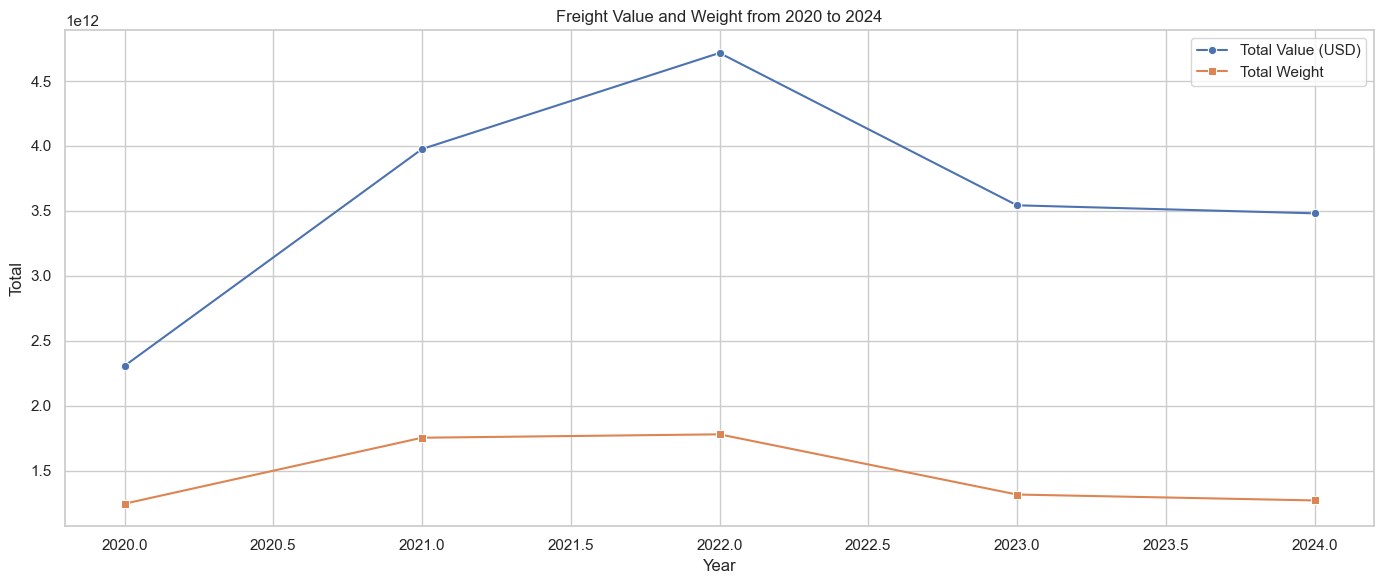

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by year and summarize total value and weight
yearly_stats = df_all.groupby('YEAR')[['VALUE', 'SHIPWT']].sum().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_stats, x='YEAR', y='VALUE', label='Total Value (USD)', marker='o')
sns.lineplot(data=yearly_stats, x='YEAR', y='SHIPWT', label='Total Weight', marker='s')
plt.title('Freight Value and Weight from 2020 to 2024')
plt.xlabel('Year')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


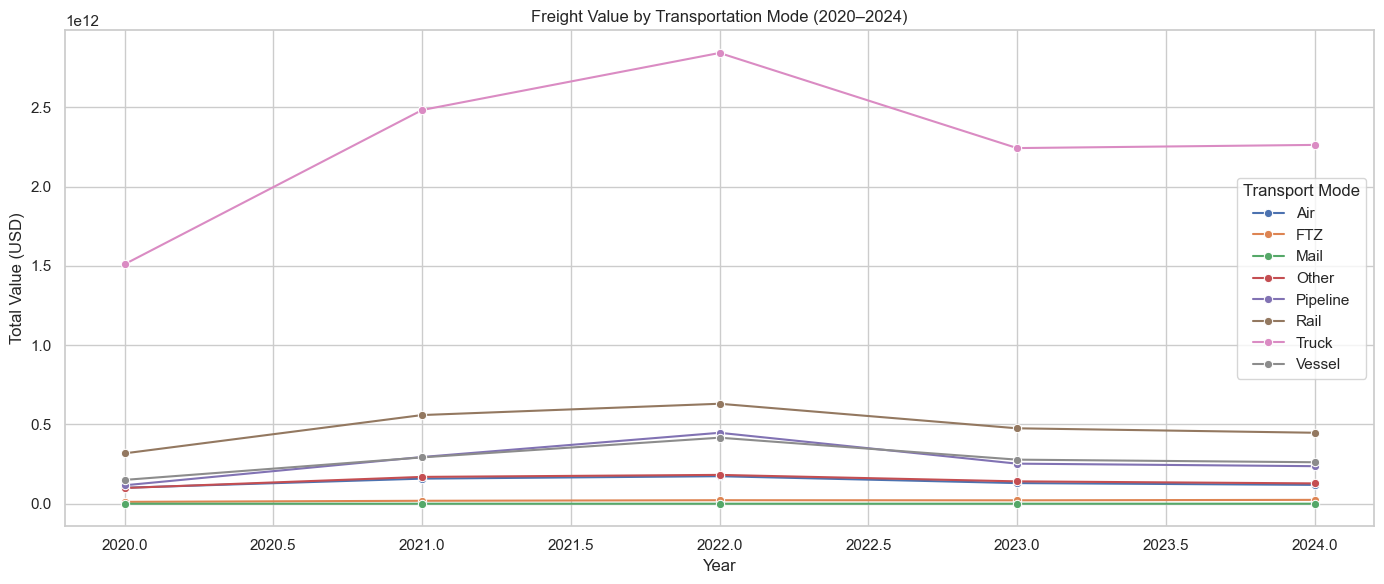

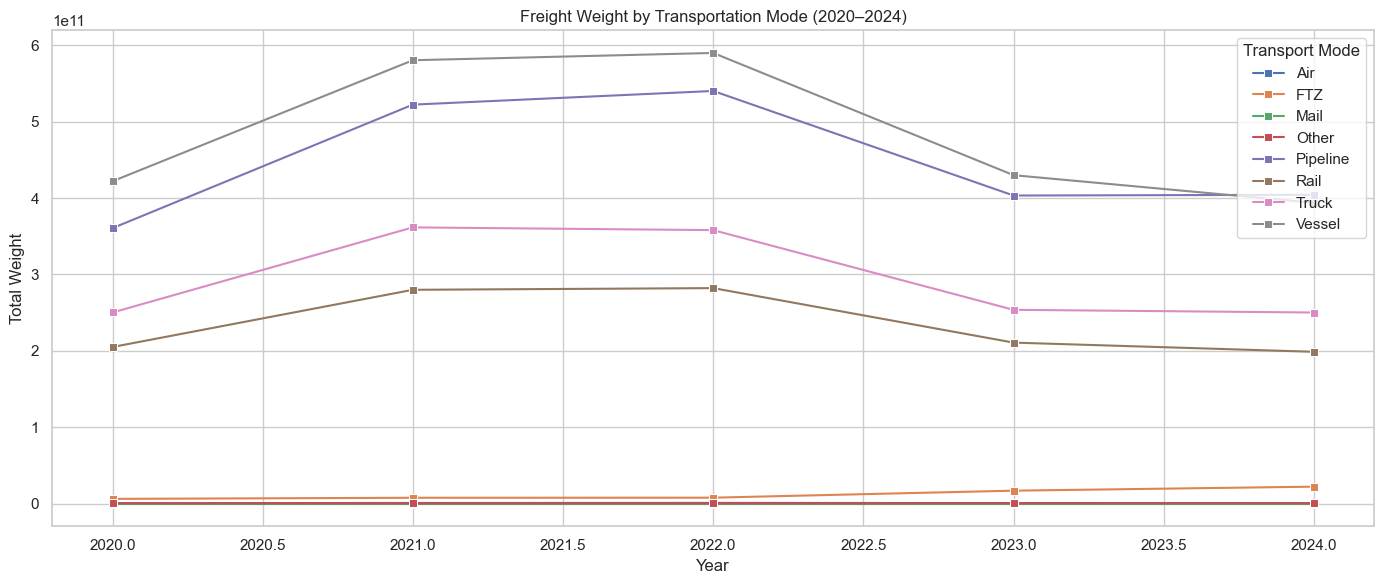

In [33]:
# Group by YEAR and DISAGMOT_MAPPED
mode_year = df_all.groupby(['YEAR', 'DISAGMOT_MAPPED'])[['VALUE', 'SHIPWT']].sum().reset_index()

# Plot: Freight VALUE by mode over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=mode_year, x='YEAR', y='VALUE', hue='DISAGMOT_MAPPED', marker='o')
plt.title('Freight Value by Transportation Mode (2020–2024)')
plt.xlabel('Year')
plt.ylabel('Total Value (USD)')
plt.legend(title='Transport Mode')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Freight WEIGHT by mode over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=mode_year, x='YEAR', y='SHIPWT', hue='DISAGMOT_MAPPED', marker='s')
plt.title('Freight Weight by Transportation Mode (2020–2024)')
plt.xlabel('Year')
plt.ylabel('Total Weight')
plt.legend(title='Transport Mode')
plt.grid(True)
plt.tight_layout()
plt.show()
